In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

# Load stock data for multiple companies
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS']
data = yf.download(tickers, start='2012-01-01', end='2024-01-01')['Adj Close']

# Display the first few rows of the dataset
data.head()


[*********************100%%**********************]  3 of 3 completed


Ticker,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,
2012-01-02,264.524567,293.171204,459.559998
2012-01-03,269.737030,300.681519,466.968292
2012-01-04,268.804779,297.154510,457.376312
2012-01-05,267.462738,290.245880,456.986481
2012-01-06,266.709381,297.735382,455.972534


Ticker      INFY.NS  RELIANCE.NS       TCS.NS
count   2958.000000  2958.000000  2958.000000
mean     708.547720  1078.100581  1710.657082
std      463.828974   765.365887   995.127740
min      200.857941   280.536407   416.119080
25%      383.628098   401.853935   991.903992
50%      488.567215   813.592102  1182.982361
75%     1167.053833  1851.948212  2727.795227
max     1838.948975  2604.952393  3806.619385


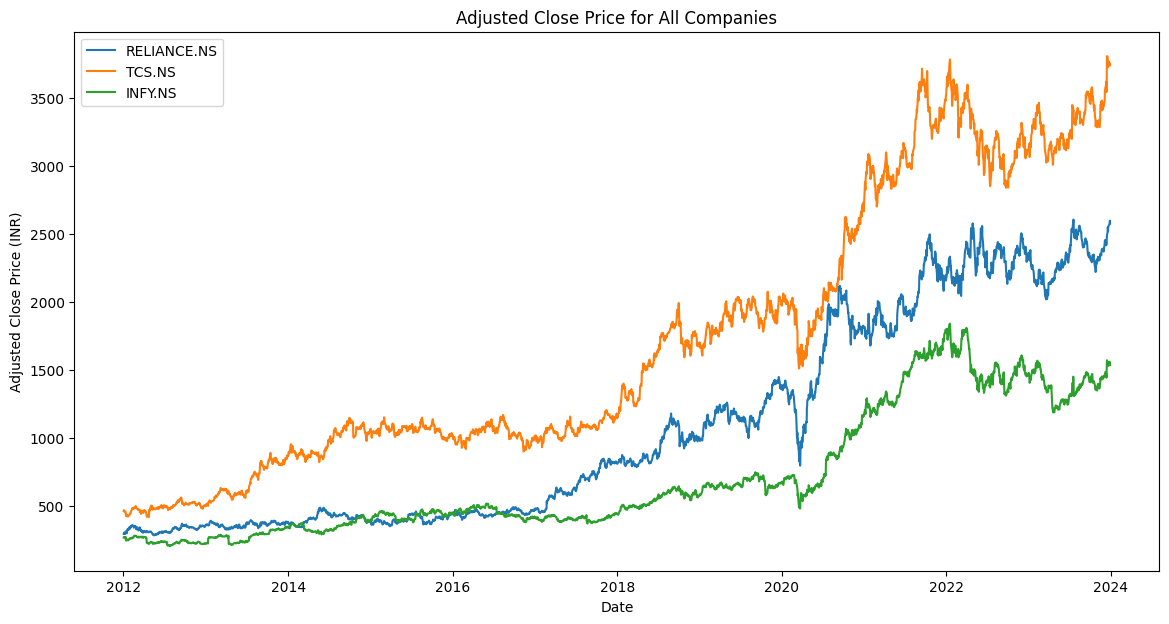

In [ ]:
# Overview of the dataset
print(data.describe())

# Plot all adjusted closing prices
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
plt.title('Adjusted Close Price for All Companies')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (INR)')
plt.legend(loc='upper left')
plt.show()


[*********************100%%**********************]  3 of 3 completed


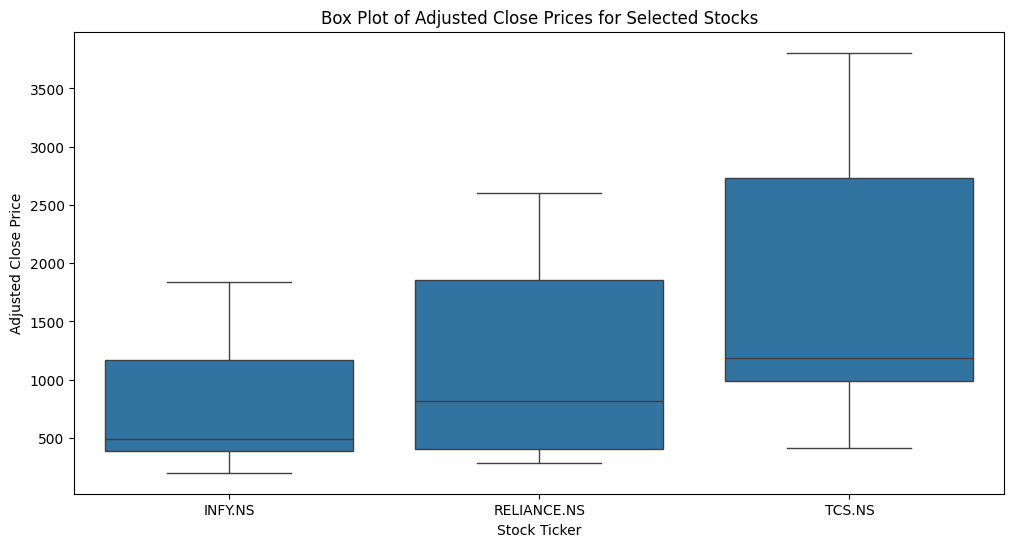

In [ ]:
import yfinance as yf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load stock data for multiple companies
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS']
data = yf.download(tickers, start='2012-01-01', end='2024-01-01')['Adj Close']

# Convert to long format for Seaborn
data_long = data.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Adjusted Close')

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ticker', y='Adjusted Close', data=data_long)
plt.title('Box Plot of Adjusted Close Prices for Selected Stocks')
plt.xlabel('Stock Ticker')
plt.ylabel('Adjusted Close Price')
plt.show()


[*********************100%%**********************]  3 of 3 completed


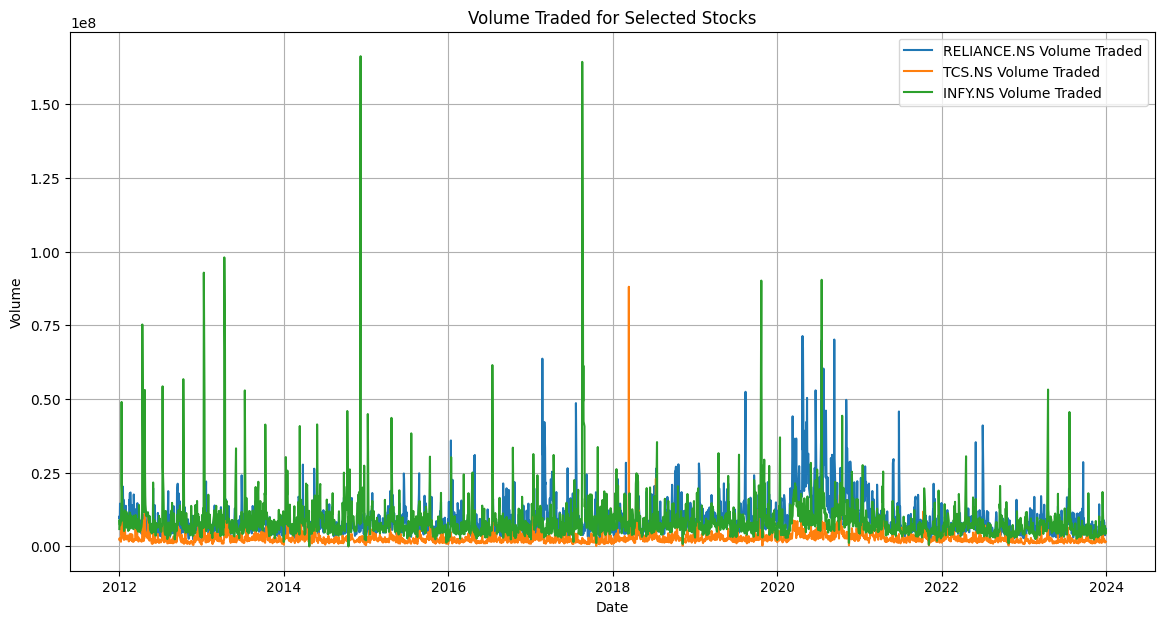

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Load volume data
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS']
volume_data = yf.download(tickers, start='2012-01-01', end='2024-01-01')['Volume']

# Plot total volume for each stock
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(volume_data.index, volume_data[ticker], label=f'{ticker} Volume Traded')

plt.title('Volume Traded for Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


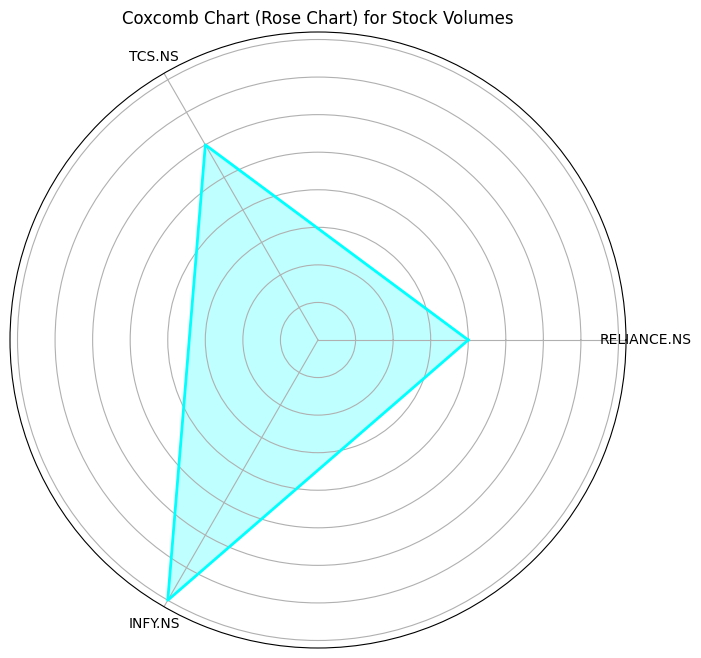

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: replace with actual data
categories = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS']
values = [1000, 1500, 2000]  # Replace with actual volume data or any other metric

# Number of categories
num_vars = len(categories)

# Compute angle for each category
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The chart needs to be a complete circle, so we need to append the start value to the end
values += values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='cyan', alpha=0.25)
ax.plot(angles, values, color='cyan', linewidth=2)

# Labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Coxcomb Chart (Rose Chart) for Stock Volumes')
plt.show()


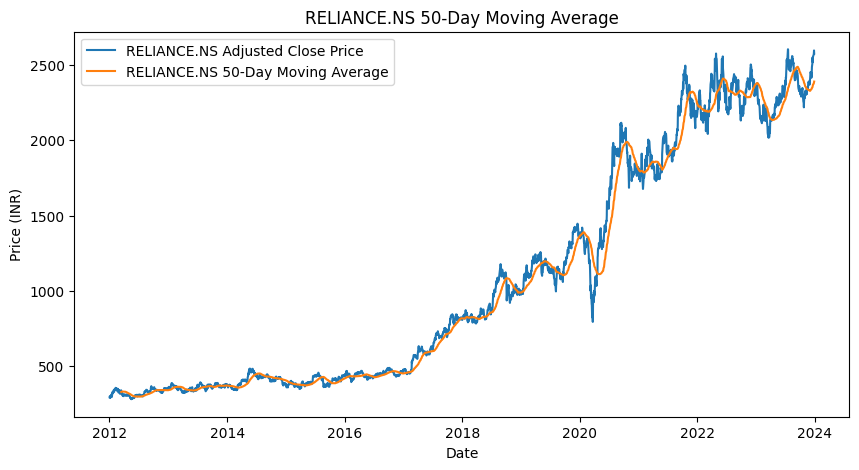

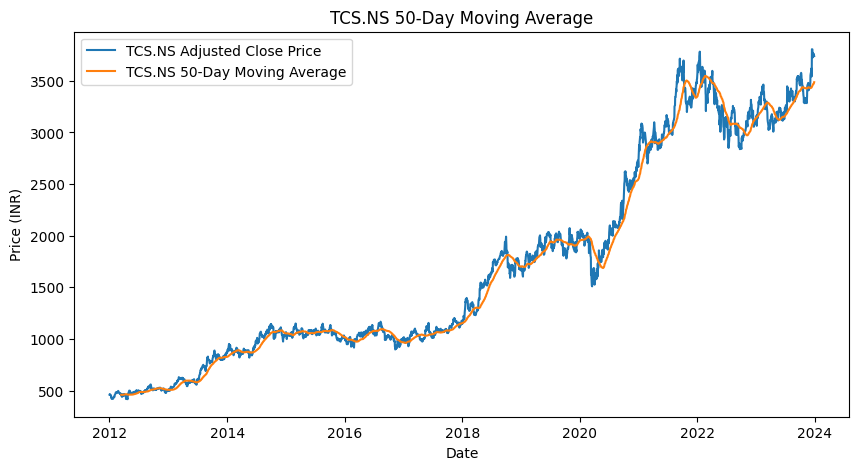

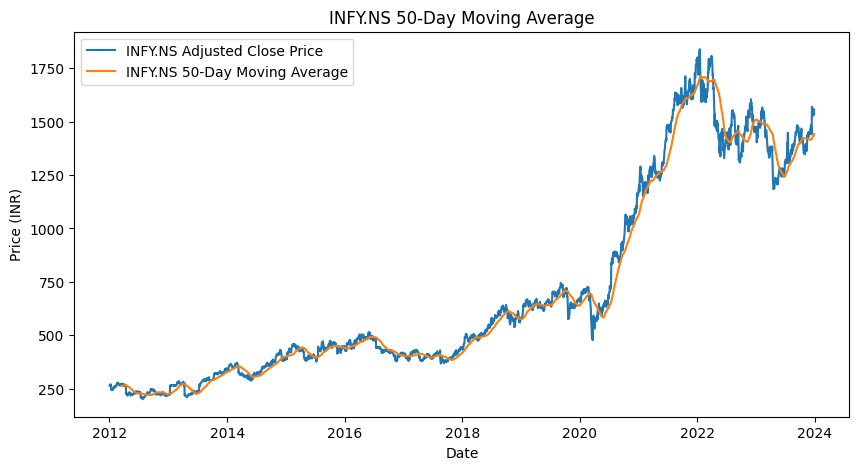

In [ ]:
# Calculate and plot the moving average (e.g., 50-day)
for ticker in tickers:
    plt.figure(figsize=(10, 5))
    data[f'{ticker}_MA50'] = data[ticker].rolling(window=50).mean()
    plt.plot(data[ticker], label=f'{ticker} Adjusted Close Price')
    plt.plot(data[f'{ticker}_MA50'], label=f'{ticker} 50-Day Moving Average')
    plt.title(f'{ticker} 50-Day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price (INR)')
    plt.legend()
    plt.show()


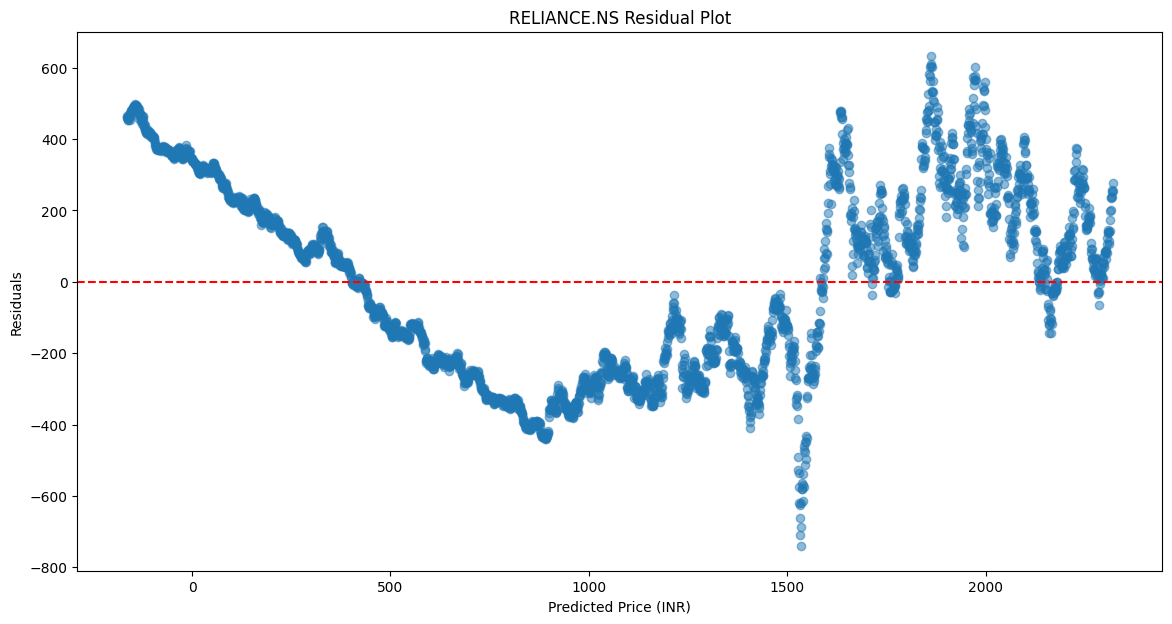

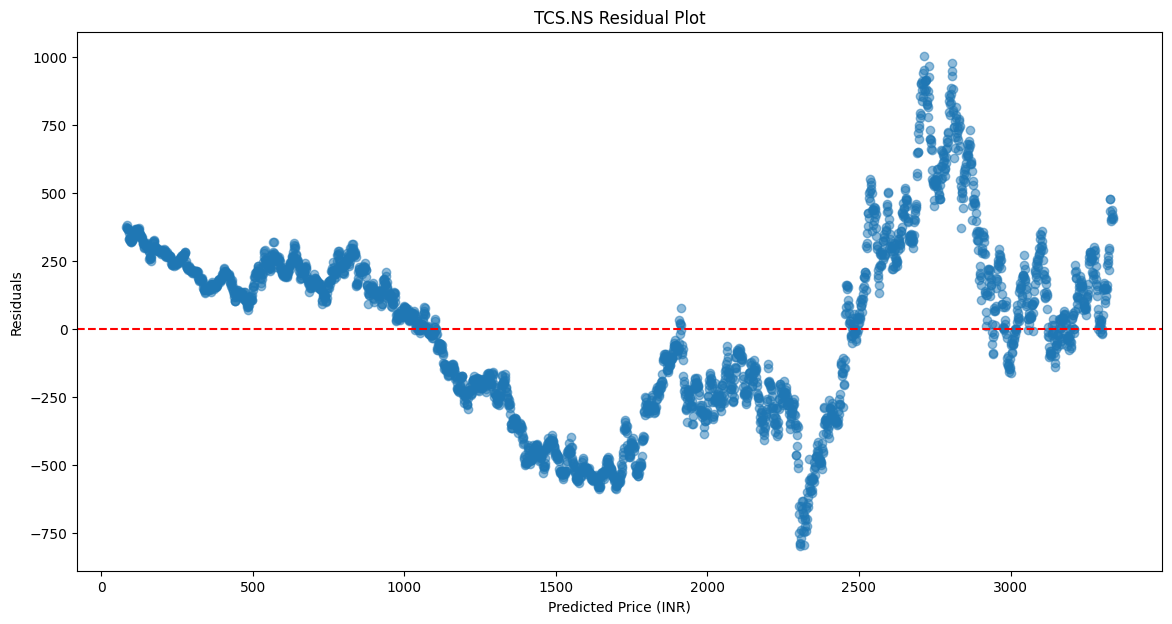

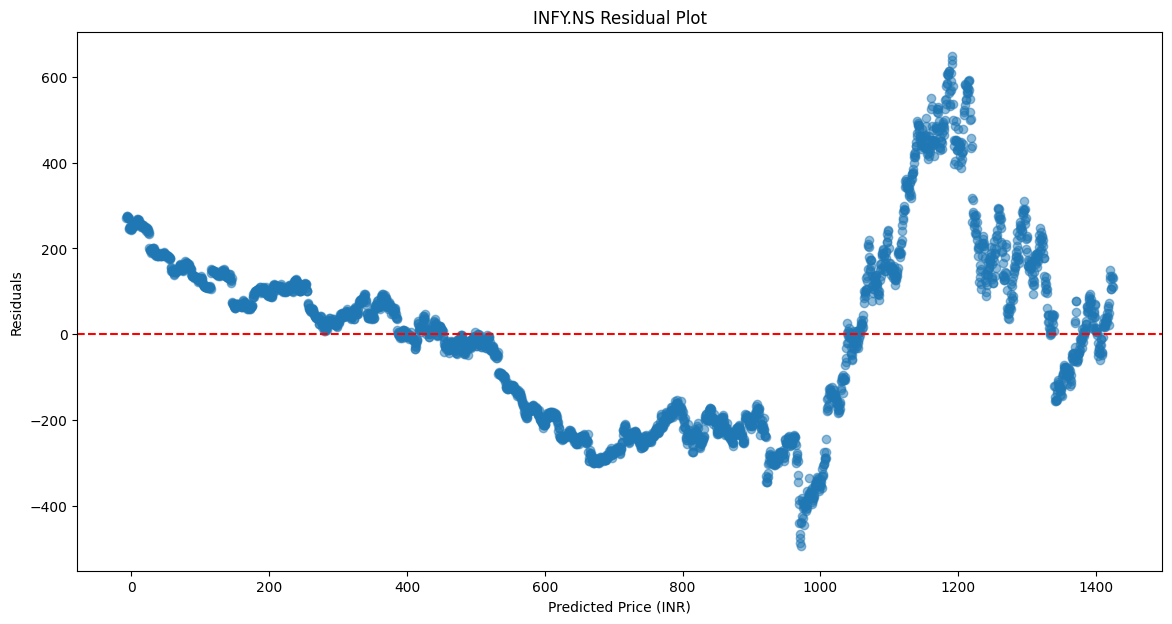

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Assuming 'data' is your DataFrame and 'tickers' is a list of ticker symbols
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS']  # Replace with your actual tickers

for ticker in tickers:
    # Prepare data for linear regression
    data = data.dropna(subset=[ticker])  # Drop rows where the ticker price is NaN
    X = pd.DataFrame({'Index': range(len(data))})
    y = data[ticker]

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict prices
    data['Predicted'] = model.predict(X)

    # Calculate residuals
    data['Residuals'] = data[ticker] - data['Predicted']

    # Plot Residual Plot
    plt.figure(figsize=(14, 7))
    plt.scatter(data['Predicted'], data['Residuals'], alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'{ticker} Residual Plot')
    plt.xlabel('Predicted Price (INR)')
    plt.ylabel('Residuals')
    plt.show()


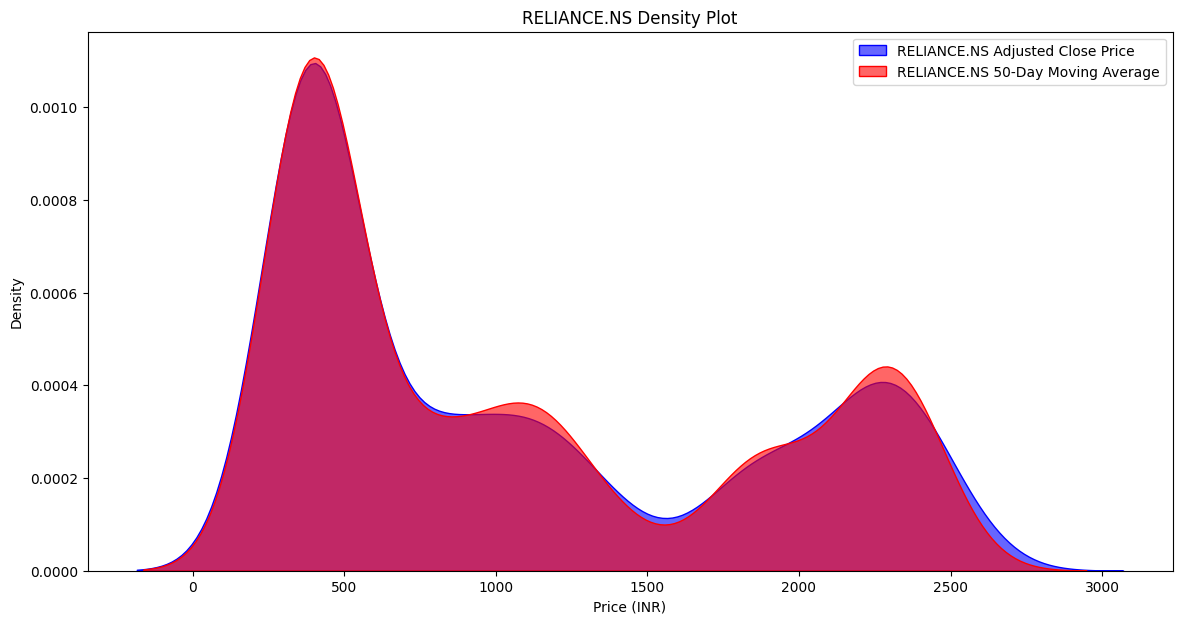

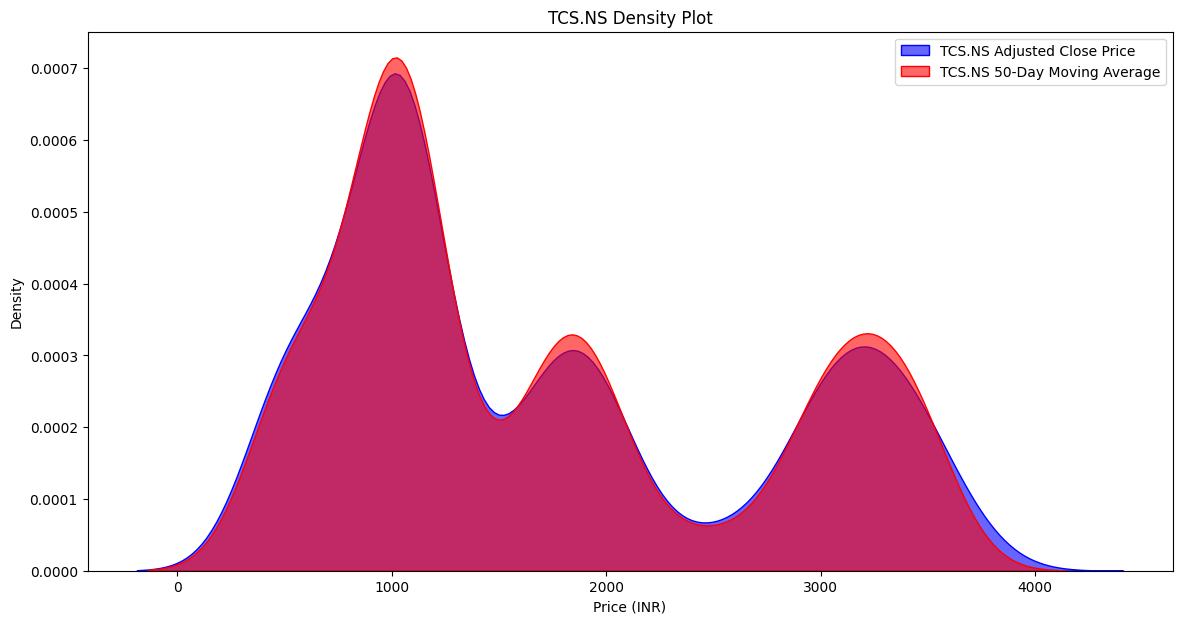

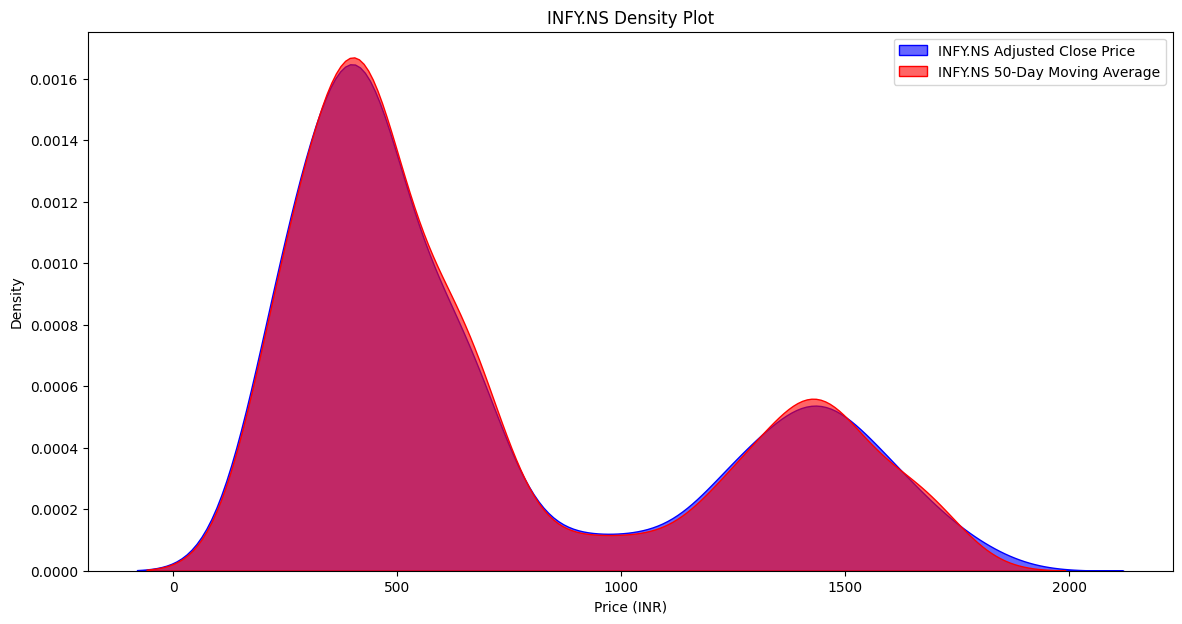

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'tickers' is a list of ticker symbols
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS']  # Replace with your actual tickers

for ticker in tickers:
    # Calculate the 50-day moving average
    data[f'{ticker}_MA50'] = data[ticker].rolling(window=50).mean()



    # Draw Density Plot for Adjusted Close Prices and Moving Averages
    plt.figure(figsize=(14, 7))
    sns.kdeplot(data[ticker].dropna(), label=f'{ticker} Adjusted Close Price', fill=True, color='blue', alpha=0.6)
    sns.kdeplot(data[f'{ticker}_MA50'].dropna(), label=f'{ticker} 50-Day Moving Average', fill=True, color='red', alpha=0.6)
    plt.title(f'{ticker} Density Plot')
    plt.xlabel('Price (INR)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


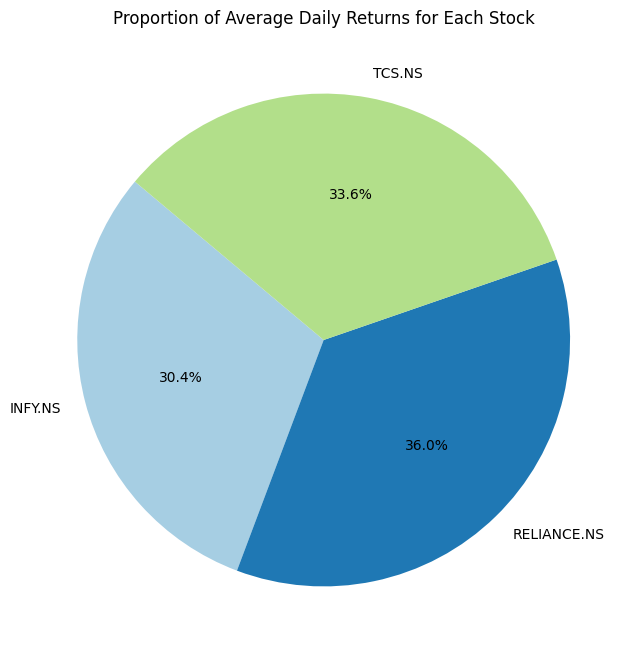

In [ ]:
# Calculate daily returns
daily_returns = data.pct_change()
daily_returns = daily_returns.dropna()

# Calculate average daily return for each stock
average_daily_returns = daily_returns.mean()

# Plot pie chart showing average daily returns proportion
plt.figure(figsize=(8, 8))
plt.pie(average_daily_returns, labels=average_daily_returns.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(tickers))))
plt.title('Proportion of Average Daily Returns for Each Stock')
plt.show()

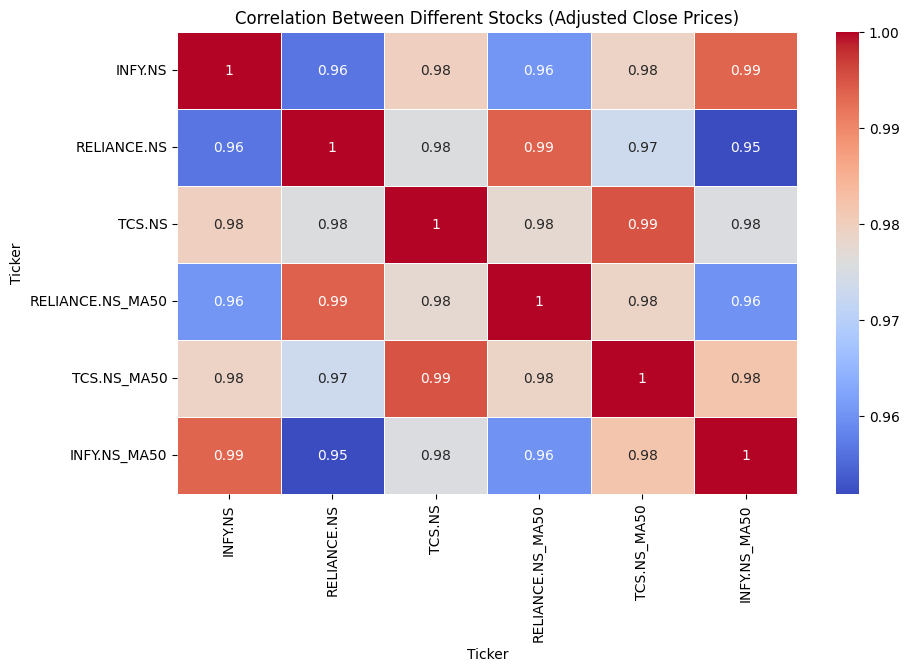

In [ ]:
# Correlation matrix of adjusted close prices
corr_matrix = data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Different Stocks (Adjusted Close Prices)')
plt.show()


Step 3: Predicting Stock Price Using LSTM

In [ ]:
# Apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]


[*********************100%%**********************]  3 of 3 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Ticker         INFY.NS  RELIANCE.NS      TCS.NS
Date                                           
2012-01-02  264.524597   293.171173  459.560089
2012-01-03  269.737030   300.681427  466.968353
2012-01-04  268.804749   297.154480  457.376282
2012-01-05  267.462799   290.245850  456.986542
2012-01-06  266.709381   297.735474  455.972839
Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0118 - val_loss: 0.0091
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 4.8555e-04 - val_loss: 0.0060
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.6040e-04 - val_loss: 0.0035
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.4668e-04 - val_loss: 0.0037
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.9519e-04 - val_loss: 0.0030
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.6907e-04 - val_loss: 0.0023
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.5732e-04 - val_loss: 0.0029
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms

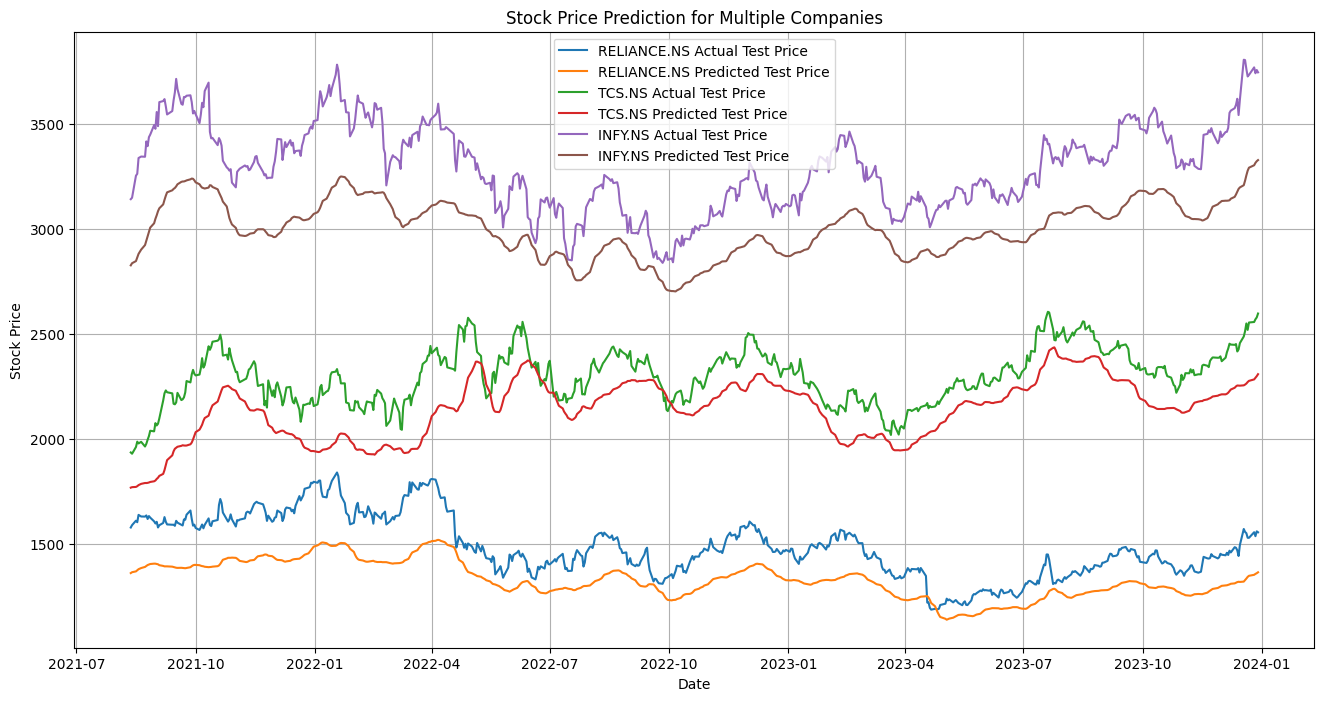

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf

# Load stock data for multiple companies
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS']
data = yf.download(tickers, start='2012-01-01', end='2024-01-01')['Adj Close']

# Display the first few rows of the dataset
print(data.head())

# Prepare data for LSTM
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Split data into train and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(len(tickers)))  # Output layer should match number of features (stocks)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.1)

# Predict and inverse transform the results
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions to get actual prices
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

# Plot results
plt.figure(figsize=(16, 8))
dates = data.index[time_step + split + 1:]

for i, ticker in enumerate(tickers):
    plt.plot(dates, y_test[:, i], label=f'{ticker} Actual Test Price')
    plt.plot(dates, test_predict[:, i], label=f'{ticker} Predicted Test Price')

plt.title('Stock Price Prediction for Multiple Companies')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Print RMSE for each stock
from sklearn.metrics import mean_squared_error

for i, ticker in enumerate(tickers):
    test_rmse = np.sqrt(mean_squared_error(y_test[:, i], test_predict[:, i]))
    print(f'{ticker} Test RMSE: {test_rmse}')


RELIANCE.NS Test RMSE: 170.17401448003577
TCS.NS Test RMSE: 176.96623689951093
INFY.NS Test RMSE: 306.5898759026353


In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error # Import mean_absolute_error

# Calculate RMSE, MAE for each stock
for i, ticker in enumerate(tickers):
    test_rmse = np.sqrt(mean_squared_error(y_test[:, i], test_predict[:, i]))
    test_mae = mean_absolute_error(y_test[:, i], test_predict[:, i]) # Now you can use mean_absolute_error
    print(f'{ticker} Test RMSE: {test_rmse}')
    print(f'{ticker} Test MAE: {test_mae}')

RELIANCE.NS Test RMSE: 170.17401448003577
RELIANCE.NS Test MAE: 156.17229272874735
TCS.NS Test RMSE: 176.96623689951093
TCS.NS Test MAE: 158.53473003840043
INFY.NS Test RMSE: 306.5898759026353
INFY.NS Test MAE: 289.92266287076274


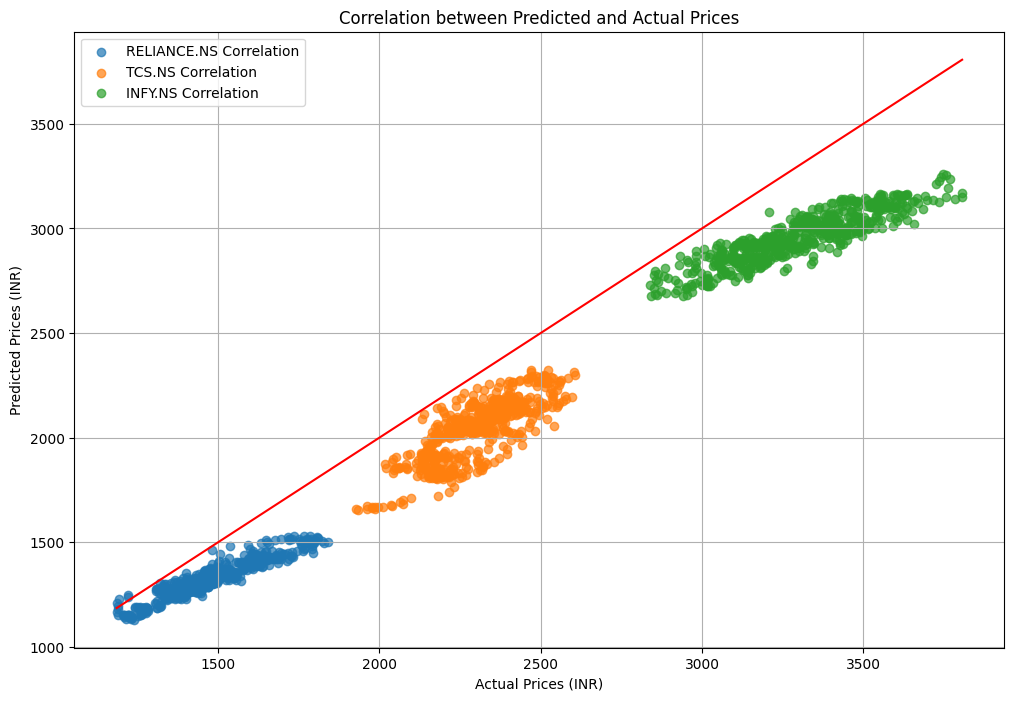

RELIANCE.NS Train Direction Accuracy: 49.19%
RELIANCE.NS Test Direction Accuracy: 49.07%
TCS.NS Train Direction Accuracy: 49.96%
TCS.NS Test Direction Accuracy: 50.93%
INFY.NS Train Direction Accuracy: 49.15%
INFY.NS Test Direction Accuracy: 53.31%


In [ ]:


# Plot Correlation between Predicted and Actual Prices
plt.figure(figsize=(12, 8))
for i, ticker in enumerate(tickers):
    plt.scatter(y_test[:, i], test_predict[:, i], label=f'{ticker} Correlation', alpha=0.7)

plt.plot([min(y_test.flatten()), max(y_test.flatten())], [min(y_test.flatten()), max(y_test.flatten())], color='red')
plt.title('Correlation between Predicted and Actual Prices')
plt.xlabel('Actual Prices (INR)')
plt.ylabel('Predicted Prices (INR)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Calculate Direction Accuracy
def calculate_direction_accuracy(actual, predicted):
    actual_direction = np.sign(actual[1:] - actual[:-1])
    predicted_direction = np.sign(predicted[1:] - predicted[:-1])
    correct_direction = np.sum(actual_direction == predicted_direction)
    accuracy = correct_direction / len(actual_direction) * 100
    return accuracy

for i, ticker in enumerate(tickers):
    train_accuracy = calculate_direction_accuracy(y_train[:, i], train_predict[:, i])
    test_accuracy = calculate_direction_accuracy(y_test[:, i], test_predict[:, i])
    print(f'{ticker} Train Direction Accuracy: {train_accuracy:.2f}%')
    print(f'{ticker} Test Direction Accuracy: {test_accuracy:.2f}%')




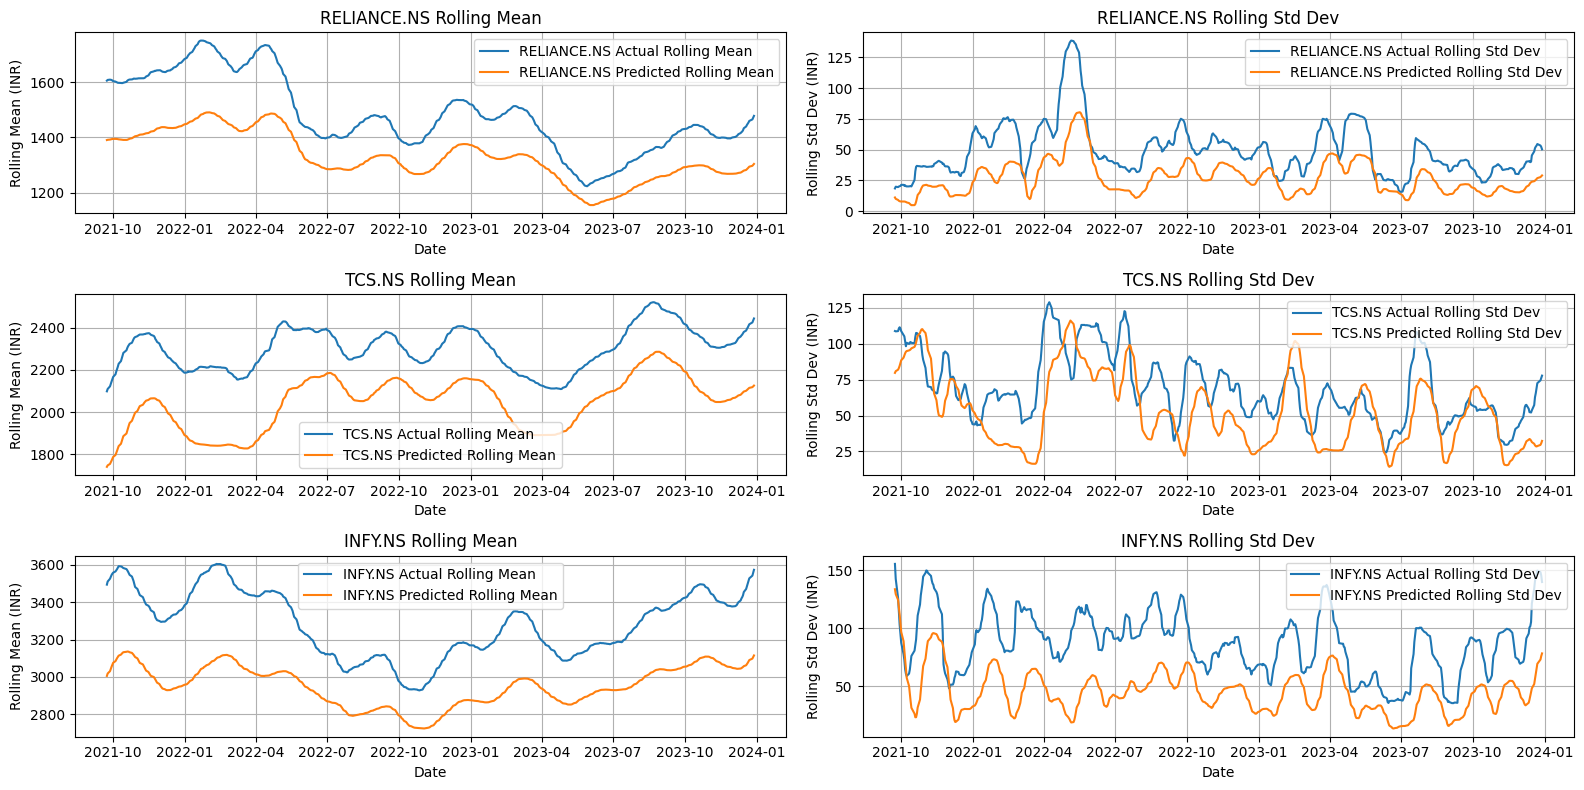

In [9]:
# Plot Rolling Statistics: Rolling Mean and Standard Deviation
rolling_window = 30  # Define rolling window size (e.g., 30 days)

plt.figure(figsize=(16, 8))
for i, ticker in enumerate(tickers):
    # Calculate rolling statistics for actual prices
    # Adjusted slicing to match data length
    rolling_mean_actual = pd.Series(y_test[:, i], index=data.index[split + time_step: split + time_step + len(y_test)]).rolling(window=rolling_window).mean()
    rolling_std_actual = pd.Series(y_test[:, i], index=data.index[split + time_step: split + time_step + len(y_test)]).rolling(window=rolling_window).std()

    # Calculate rolling statistics for predicted prices
    rolling_mean_predicted = pd.Series(test_predict[:, i], index=data.index[split + time_step: split + time_step + len(y_test)]).rolling(window=rolling_window).mean()
    rolling_std_predicted = pd.Series(test_predict[:, i], index=data.index[split + time_step: split + time_step + len(y_test)]).rolling(window=rolling_window).std()

    plt.subplot(len(tickers), 2, 2*i + 1)
    plt.plot(rolling_mean_actual, label=f'{ticker} Actual Rolling Mean')
    plt.plot(rolling_mean_predicted, label=f'{ticker} Predicted Rolling Mean')
    plt.title(f'{ticker} Rolling Mean')
    plt.xlabel('Date')
    plt.ylabel('Rolling Mean (INR)')
    plt.legend()
    plt.grid(True)

    plt.subplot(len(tickers), 2, 2*i + 2)
    plt.plot(rolling_std_actual, label=f'{ticker} Actual Rolling Std Dev')
    plt.plot(rolling_std_predicted, label=f'{ticker} Predicted Rolling Std Dev')
    plt.title(f'{ticker} Rolling Std Dev')
    plt.xlabel('Date')
    plt.ylabel('Rolling Std Dev (INR)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()